In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load dataset
df = pd.read_csv("/content/DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')

# **Overview Of Dataset**

In [3]:
df.shape

(180519, 53)

In [4]:
print(df.columns)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [5]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
df.isnull().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


# **Data Cleaning**

In [7]:
critical_cols = ["order date (DateOrders)", "shipping date (DateOrders)", "Days for shipment (scheduled)"]
df.dropna(subset=critical_cols, inplace=True)
df.drop_duplicates(inplace=True)

# **Data Preprocessing**

In [8]:
# Convert to datetime
df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"], errors='coerce')
df["shipping date (DateOrders)"] = pd.to_datetime(df["shipping date (DateOrders)"], errors='coerce')

In [9]:
# Calculate lead time
df["lead_time_days"] = (df["shipping date (DateOrders)"] - df["order date (DateOrders)"]).dt.days

In [10]:
# On-time delivery flag
df["is_ontime"] = (df["lead_time_days"] <= df["Days for shipment (scheduled)"]).astype(int)

In [11]:
print("Rows after cleaning:", df.shape[0])
df.head()

Rows after cleaning: 180519


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,lead_time_days,is_ontime
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,3,1
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class,5,0
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class,4,1
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class,3,1
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class,2,1


# **KPI Calculations**

In [12]:
# On-Time Delivery by category
otd_category = df.groupby("Category Name")["is_ontime"].mean().sort_values(ascending=False) * 100

In [13]:
# Average lead time by category
avg_lead_time = df.groupby("Category Name")["lead_time_days"].mean().sort_values()

In [14]:
# Inventory turnover ratio approximation
inventory_turnover = df.groupby("Category Name").apply(
    lambda x: x["Sales"].sum() / x["Order Item Quantity"].mean()
).sort_values(ascending=False)

/tmp/ipython-input-3090191756.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  inventory_turnover = df.groupby("Category Name").apply(


In [15]:
# Seasonal demand trend
df["order_month"] = df["order date (DateOrders)"].dt.to_period("M")
monthly_sales = df.groupby("order_month")["Sales"].sum()

In [16]:
otd_category.head(), avg_lead_time.head(), inventory_turnover.head(), monthly_sales.head()

(Category Name
 Baby                52.657005
 Men's Golf Clubs    51.236749
 Books               50.617284
 CDs                 48.708487
 Golf Apparel        48.526077
 Name: is_ontime, dtype: float64,
 Category Name
 Baby                 3.077295
 Books                3.308642
 Cameras              3.324324
 Golf Bags & Carts    3.327869
 Pet Supplies         3.341463
 Name: lead_time_days, dtype: float64,
 Category Name
 Fishing             6.929654e+06
 Camping & Hiking    4.118426e+06
 Water Sports        3.113845e+06
 Men's Footwear      2.891758e+06
 Cleats              1.475691e+06
 dtype: float64,
 order_month
 2015-01    1.051590e+06
 2015-02    9.270099e+05
 2015-03    1.051254e+06
 2015-04    1.014463e+06
 2015-05    1.050478e+06
 Freq: M, Name: Sales, dtype: float64)

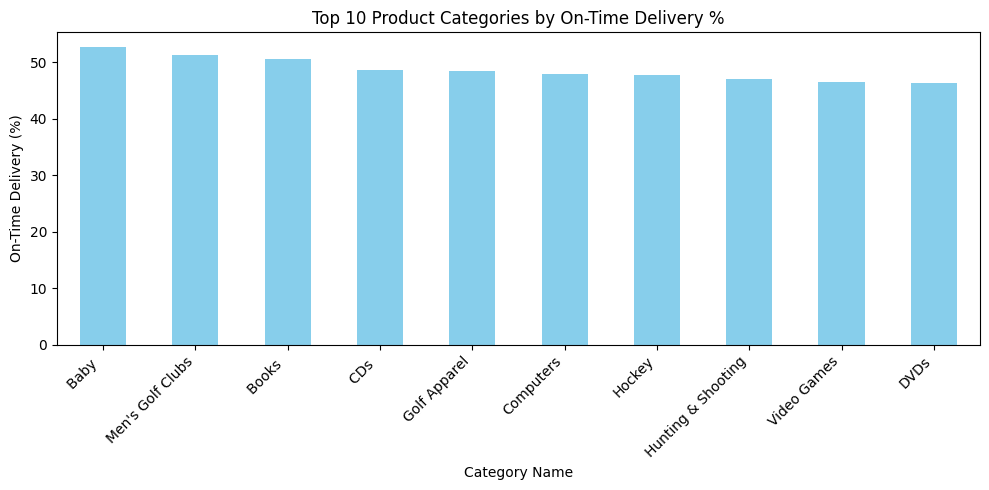

In [17]:
plt.figure(figsize=(10,5))
otd_category.head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Product Categories by On-Time Delivery %")
plt.ylabel("On-Time Delivery (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

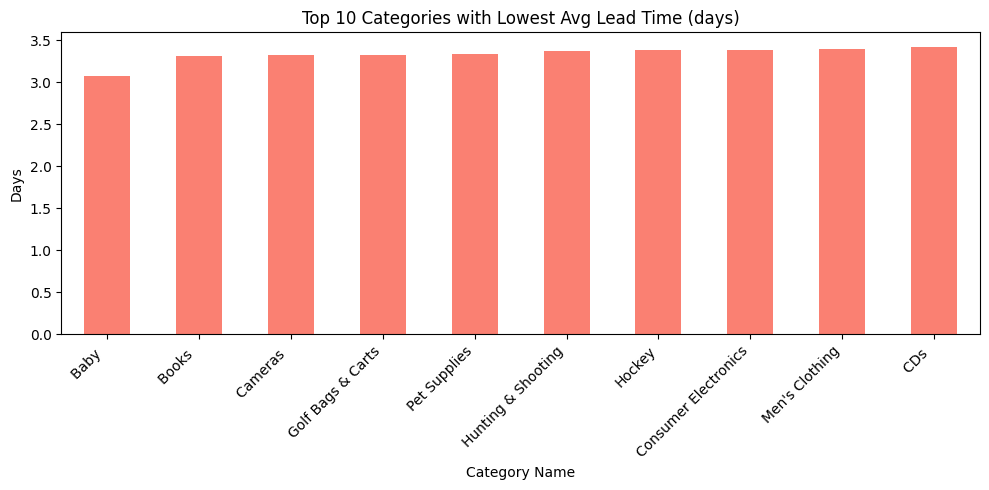

In [18]:
plt.figure(figsize=(10,5))
avg_lead_time.head(10).plot(kind="bar", color="salmon")
plt.title("Top 10 Categories with Lowest Avg Lead Time (days)")
plt.ylabel("Days")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

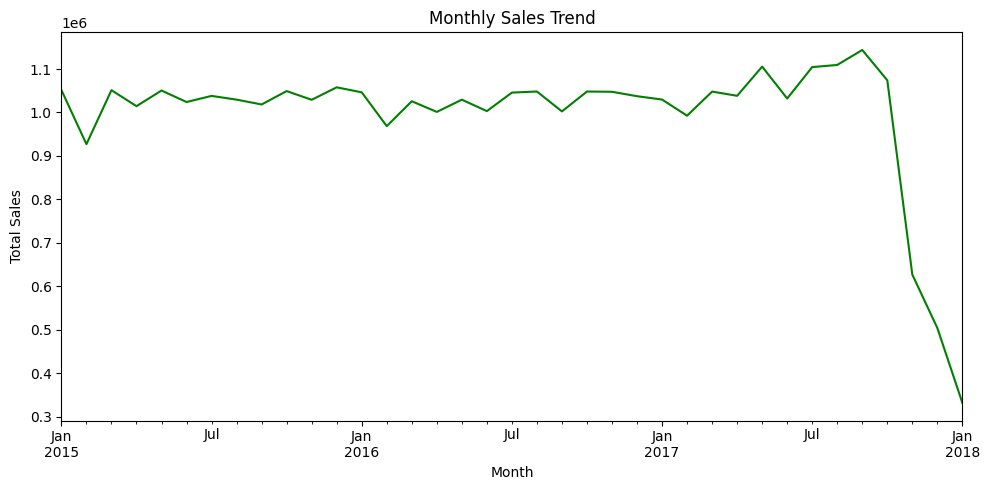

In [19]:
plt.figure(figsize=(10,5))
monthly_sales.plot(color="green")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

In [23]:
from statsmodels.tsa.seasonal import STL
region_col = "Order Region"
category_col = "Category Name"
delay_by_region = df.groupby(region_col)["lead_time_days"].mean().sort_values(ascending=False)
delay_by_category = df.groupby(category_col)["lead_time_days"].mean().sort_values(ascending=False)

print("Regions with Highest Average Lead Time:\n", delay_by_region.head(5))
print("\nCategories with Highest Average Lead Time:\n", delay_by_category.head(5))

Regions with Highest Average Lead Time:
 Order Region
Central Africa     3.546213
West Africa        3.510552
Eastern Asia       3.500275
East Africa        3.492441
Central America    3.486010
Name: lead_time_days, dtype: float64

Categories with Highest Average Lead Time:
 Category Name
Strength Training    3.729730
Soccer               3.688406
As Seen on  TV!      3.617647
DVDs                 3.616977
Kids' Golf Clubs     3.609375
Name: lead_time_days, dtype: float64
